### Read Data

In [1]:
from cleanData import cleanData
import time

start = time.time()
data = cleanData(verbose=0)
end = time.time()
print('Time: Data Extraction: {} seconds'.format(end - start) ); 


Dataset already downloaded
['US_Accidents_Dec20_updated.csv']
Number of Raw Data: DataFrames extracted: 1
Deleted: 34680 values (2.287502374569939% of raw data) because of invalid time format


################################################################### 

column: Side. Number of possible values: 2 
	Values = ['R' 'L']

column: State. Number of possible values: 49 
	Values = ['OH' 'IN' 'KY' 'WV' 'PA' 'MI' 'CA' 'MN' 'LA' 'NE' 'MO' 'IA' 'ND' 'CO'
 'KS' 'TX' 'WI' 'OK' 'WY' 'SD' 'MS' 'AR' 'IL' 'MA' 'RI' 'ME' 'NY' 'TN'
 'FL' 'MD' 'NC' 'GA' 'VA' 'CT' 'NJ' 'DE' 'NH' 'SC' 'VT' 'DC' 'AL' 'MT'
 'ID' 'UT' 'AZ' 'NM' 'NV' 'WA' 'OR']

column: Timezone. Number of possible values: 4 
	Values = ['US/Eastern' 'US/Pacific' 'US/Central' 'US/Mountain']

column: Wind_Direction. Number of possible values: 23 
	Values = ['SW' 'WSW' 'West' 'NNW' 'WNW' 'NW' 'W' 'SSW' 'East' 'SE' 'North' 'ENE'
 'NNE' 'NE' 'SSE' 'CALM' 'South' 'ESE' 'S' 'Variable' 'VAR' 'N' 'E']

column: Weather_Condition. Number of possib

In [2]:
data

Severity  Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0               3         3.230            42.1           36.1         58.0   
5               3         0.500            37.0           29.8         93.0   
9               2         0.521            33.1           30.0         92.0   
11              2         0.826            32.0           28.7        100.0   
12              2         0.307            33.8           29.6        100.0   
...           ...           ...             ...            ...          ...   
1516059         2         0.543            86.0           86.0         40.0   
1516060         2         0.338            70.0           70.0         73.0   
1516061         2         0.561            73.0           73.0         64.0   
1516062         2         0.772            71.0           71.0         81.0   
1516063         2         0.537            79.0           79.0         47.0   

         Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
0               29.76            10.0             10.4               0.00   
5               29.69            10.0             10.4               0.01   
9               29.63             0.5              3.5               0.08   
11              29.59             0.5              3.5               0.05   
12              29.66             3.0              4.6               0.03   
...               ...             ...              ...                ...   
1516059         28.92            10.0             13.0               0.00   
1516060         29.39            10.0              6.0               0.00   
1516061         29.74            10.0             10.0               0.00   
1516062         29.62            10.0              8.0               0.00   
1516063         28.63             7.0              7.0               0.00   

         Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
0              0     0         0         0         0        0        0   
5              0     0         0         0         0        0        0   
9              0     0         0         0         1        0        0   
11             0     0         0         0         0        0        0   
12             0     0         0         0         0        0        0   
...          ...   ...       ...       ...       ...      ...      ...   
1516059        0     0         0         0         0        0        0   
1516060        0     0         0         0         0        0        0   
1516061        0     0         0         0         1        0        0   
1516062        0     0         0         0         0        0        0   
1516063        0     0         0         0         0        0        0   

         Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  \
0                 0        0     0                0               0   
5                 0        0     0                0               0   
9                 0        0     0                0               0   
11                0        0     0                0               0   
12                0        0     0                0               0   
...             ...      ...   ...              ...             ...   
1516059           0        0     0                0               0   
1516060           0        0     0                0               0   
1516061           0        0     0                0               0   
1516062           0        0     0                0               0   
1516063           0        0     0                0               0   

         Turning_Loop  incidentTimeLength_seconds  preCovid  Side_L  Side_R  \
0                   0                     21600.0         1       0       1   
5                   0                     21600.0         1       0       1   
9                   0                     21600.0         1       0       1   
11                  0                     21600.0         1       0       1  

# Prepare for model training

In [12]:
import numpy as np
import pandas as pd
from regressionLib import splitCV, plotBetaAccuracy
import matplotlib.pyplot as plt

In [13]:
predictorColNames = data.columns[1:]
X = np.array(data[predictorColNames])
targetColNames = data.columns[0]
Y = np.array(data[data.columns[0]])

In [14]:
dataDict = {'X':X,
            'Y':Y,
            'predictorNames':predictorColNames,
            'targetName':targetColNames}

In [15]:
dataDict   ## everything you need is in this dictionary

{'X': array([[ 3.23 , 42.1  , 36.1  , ...,  1.   ,  0.   ,  1.   ],
        [ 0.5  , 37.   , 29.8  , ...,  0.   ,  1.   ,  0.   ],
        [ 0.521, 33.1  , 30.   , ...,  0.   ,  1.   ,  0.   ],
        ...,
        [ 0.561, 73.   , 73.   , ...,  0.   ,  1.   ,  0.   ],
        [ 0.772, 71.   , 71.   , ...,  0.   ,  1.   ,  0.   ],
        [ 0.537, 79.   , 79.   , ...,  0.   ,  1.   ,  0.   ]]),
 'Y': array([3, 3, 2, ..., 2, 2, 2], dtype=int64),
 'predictorNames': Index(['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
        'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
        'Precipitation(in)', 'Amenity', 'Bump',
        ...
        'Weather_Condition_Wintry Mix', 'Weather_Condition_Wintry Mix / Windy',
        'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night', 'Civil_Twilight_Day',
        'Civil_Twilight_Night', 'Nautical_Twilight_Day',
        'Nautical_Twilight_Night', 'Astronomical_Twilight_Day',
        'Astronomical_Twilight_Night'],
       dtype='object'

In [16]:
XTrain,XTest,YTrain,YTest,idxTrain,idxTest = splitCV(dataDict['X'],dataDict['Y'],returnIdx=True).testTrain(testRatio=0.5)

## Model: Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
'''
Train Logistic Regression
'''
start = time.time()
logisticRegr.fit(XTrain, YTrain)
end = time.time()
print('Time: Logistic Regression (sklearn): {} seconds'.format(end - start) ); 

'''
Predict using Logistic Regression
'''
pred = []
for i in range(YTest.shape[0]):
    pred.append(logisticRegr.predict(XTest[i].reshape(1,-1)))

pred = np.array(pred).reshape(YTest.shape)
print('Logistic Regression Accuracy: {}'.format( np.mean(pred == YTest) ) )


Time: Logistic Regression (sklearn): 13.059863567352295 seconds
Logistic Regression Accuracy: 0.8482562024159092


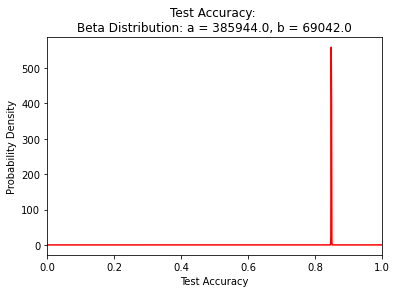

In [18]:
accuracy = np.mean(pred == YTest)
plotBetaAccuracy(accuracy,XTest.shape[0])